In [30]:
''' numpy - типов данных
    pandas - чтения csv 
    wave - чтение wave файла
    os - проверка существования пути файла
'''

import numpy as np
import pandas as pd
import wave
import os


# Типы данных амплитуд
types = {
    1: np.int8,
    2: np.int16,
    4: np.int32,
}


# Открытие файла на разбор
def wave_open(filepath):
    if not os.path.exists(filepath):
        return None
    with open(filepath, 'r') as file_handler:
        wavf =  wave.open(filepath, mode='r')
        return wavf

''' Путь к файлу '''
wav = wave_open("/Users/nikita/Documents/python_3_filies/ML/ML_sound_1/Eee_1.wav")

# Различные вкусности из wave-файла
''' Кол-во каналов '''
def nchannals():
    nchannals_var = wav.getnchannels()
    return nchannals_var

''' Длина семпла (int8, int16, int32) '''
def sampwidth():
    sampwidth_var = wav.getsampwidth()
    return  sampwidth_var

''' Частота окон '''
def framerate():
    framerate_var = wav.getframerate()
    return framerate_var

''' Кол-во окон '''
def nframes():
    nframes_var = wav.getnframes()
    return  nframes_var

''' Тип сжатия '''
def comptype():
    comptype_var = wav.getcomptype()
    return comptype_var

''' Название сжатия '''
def compname():
    compname_var = wav.getcompname()
    return compname_var

''' Длительность записи '''
def duration():
    duration_var = nframes()/framerate()
    return duration_var

# Значения амплитуд в 10-ричной системе счисления
def channel_data():
    byte_content = wav.readframes(nframes())
    samples = np.fromstring(byte_content, dtype=types[sampwidth()])
    #for n in range(nchannals()):
    channel = samples
    return channel

''' Битовые данные'''
byte_content = wav.readframes(nframes())

''' Представление битов в int8(16,32) '''
samples = np.fromstring(byte_content, dtype=types[sampwidth()])

''' Образка первых 1000 семплов, т.к. там ненужный шум, позже можно будет убрать '''
samples = samples[1000:]
#samples = samples[131000:132000]

''' Логарифмирование семплов + минимальное значение int16 (т.к. запись была в int16), ибо логарифм не может иметь отрицательный аргумент '''
samples_log = np.log(samples+32768)
len(samples)

1433600

In [31]:
import matplotlib.pyplot as plt

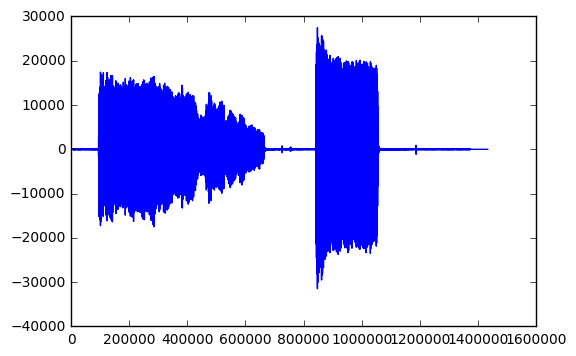

In [32]:
''' График оригинальных семплов '''
plt.plot(range(len(samples)),samples)
plt.show()

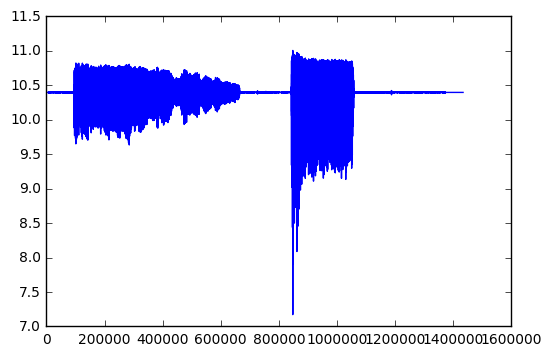

In [33]:
''' График прологарифмированных семплов (делее, лог-семплы) '''
plt.plot(range(len(samples_log)),samples_log)
plt.show()

In [34]:
''' Преобразование Фурье из прологарифмированных семплов '''
samples_fourier = np.fft.fft(samples_log)

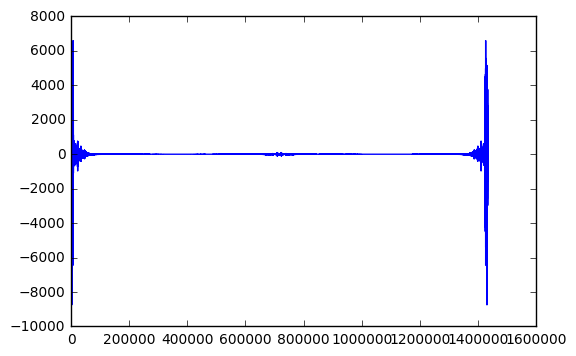

In [35]:
''' Действительная часть пребразования фурье '''
plt.plot(range(len(samples_fourier[1:])),samples_fourier.real[1:],)#'ro')
plt.show()

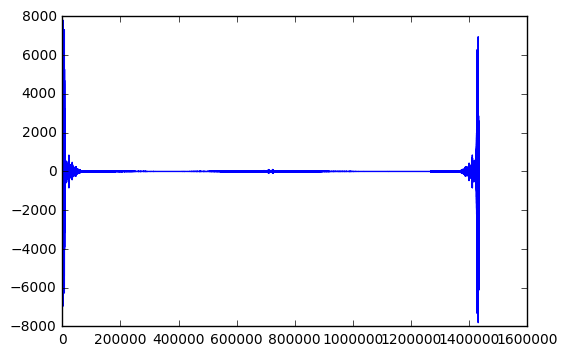

In [36]:
''' Комплексная часть пребразования фурье (подозрительно похоже чет))0)0))'''
plt.plot(range(len(samples_fourier[1:])),samples_fourier.imag[1:],)#'ro')
plt.show()

In [37]:
len(np.imag(samples_fourier))

1433600

In [38]:
''' Массив из Фурье-преобразований семплов(далее, фурье-семпл), один семпл - по 1000 бит значений '''
fourier_samples = []
begin = 0
step = 1000
end = step

''' Значение для хранения временного семпла '''
tmp_sample = samples[begin:end] 

''' Добавление первого фурье-семпла  '''
fourier_samples.append(np.fft.fft(np.log(tmp_sample+32768)).real) 

''' Проход по массиву семплов и получение фурье-семплов '''
while end < len(samples):
    abs_sample = [abs(i) for i in tmp_sample]
    ''' Проверка на тишину (будем считать тишиной абсолютную сумму семпла меньшую 50000) '''
    if sum(abs_sample) > 50000: 
        tmp_sample = np.log(tmp_sample+32768) # ''' Временный лог-семпл '''
        tmp_fourier = np.fft.fft(tmp_sample).real # ''' Временный фурье-семпл '''
        fourier_samples.append(tmp_fourier)
        begin += step
        end += step
        tmp_sample = samples[begin:end] 
        print(end,sum(tmp_sample),sum(abs_sample))
    else:
        print(end,sum(abs_sample),'-')
        begin += step
        end += step
        tmp_sample = samples[begin:end]


        

1000 0 -
2000 0 -
3000 0 -
4000 0 -
5000 12 -
6000 15514 -
7000 19578 -
8000 15158 -
9000 17602 -
10000 16886 -
11000 20122 -
12000 17728 -
13000 18214 -
14000 21636 -
15000 17228 -
16000 17324 -
17000 17870 -
18000 14794 -
19000 17256 -
20000 13608 -
21000 15770 -
22000 18096 -
23000 23708 -
24000 21624 -
25000 26044 -
26000 15990 -
27000 19886 -
28000 17602 -
29000 18796 -
30000 18610 -
31000 17394 -
32000 20244 -
33000 24720 -
34000 16250 -
35000 25032 -
36000 16992 -
37000 19574 -
38000 18190 -
39000 18024 -
40000 13412 -
41000 14964 -
42000 21172 -
43000 19812 -
44000 14778 -
45000 19896 -
46000 19458 -
47000 15560 -
48000 20920 -
49000 18112 -
50000 13034 -
51000 17160 -
52000 17538 -
53000 22978 -
54000 15016 -
55000 19848 -
56000 16044 -
57000 17800 -
58000 15668 -
59000 19832 -
60000 13668 -
61000 17778 -
62000 16620 -
63000 24708 -
64000 16822 -
65000 20924 -
66000 14782 -
67000 18406 -
68000 16194 -
69000 16048 -
70000 16686 -
71000 16368 -
72000 18026 -
73000 19820 -
74000 

In [39]:
len(fourier_samples)

811

In [41]:
''' Формирование датасета '''
answer = pd.DataFrame(fourier_samples)

In [43]:
''' Запись датасета в csv файл '''
answer.to_csv('/Users/nikita/Documents/python_3_filies/ML/ML_sound_1/fourier_Eee_1.csv', index=False)

In [45]:
''' Дальше ничего полезного, но тут можно повозиться и понять как работает фурье '''

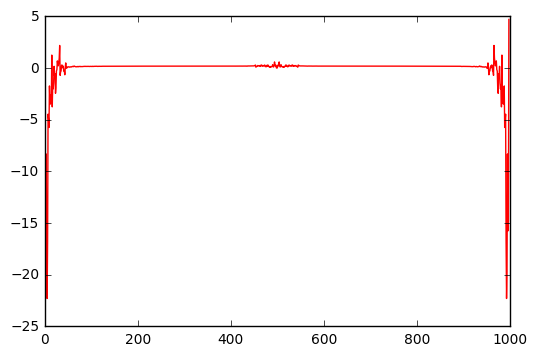

10416.5185621


In [54]:
#fourier_samples[0]
which =5

ys = fourier_samples[which][1:]
t = np.arange(len(ys))
freq = np.fft.fftfreq(t.shape[-1])


plt.plot(t,ys,'r')
plt.show()

print(max(fourier_samples[which]))


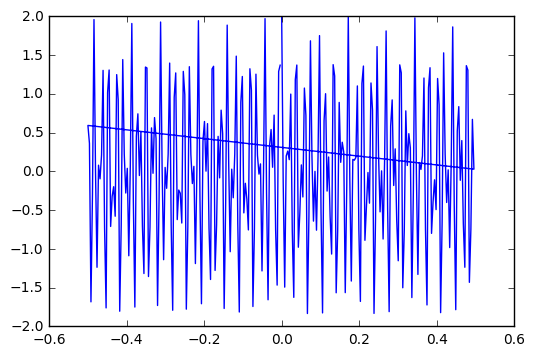

In [769]:
t = np.arange(256)
freq = np.fft.fftfreq(t.shape[-1])
plt.plot(freq,np.cos(5*t)+np.cos(2*t))
plt.show()

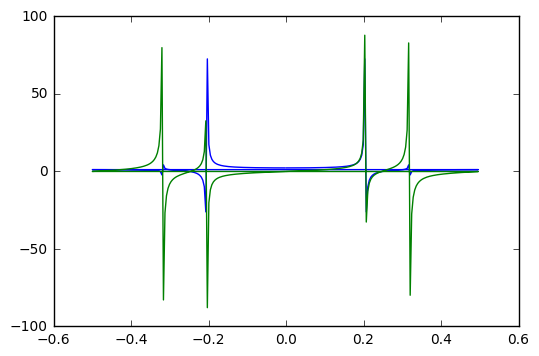

In [717]:
import matplotlib.pyplot as plt
#t = np.arange(256)
sp = np.fft.fft(np.cos(5*t)+np.cos(2*t))
freq = np.fft.fftfreq(t.shape[-1])
plt.plot(freq, sp.real, freq, sp.imag)
#plt.plot(t,np.cos(t))
plt.show()